Chosen Image: ./data_dataset_voc/JPEGImages\dog.77.jpg
Corresponding Mask: ./data_dataset_voc/SegmentationClassNpy\dog.77.npy


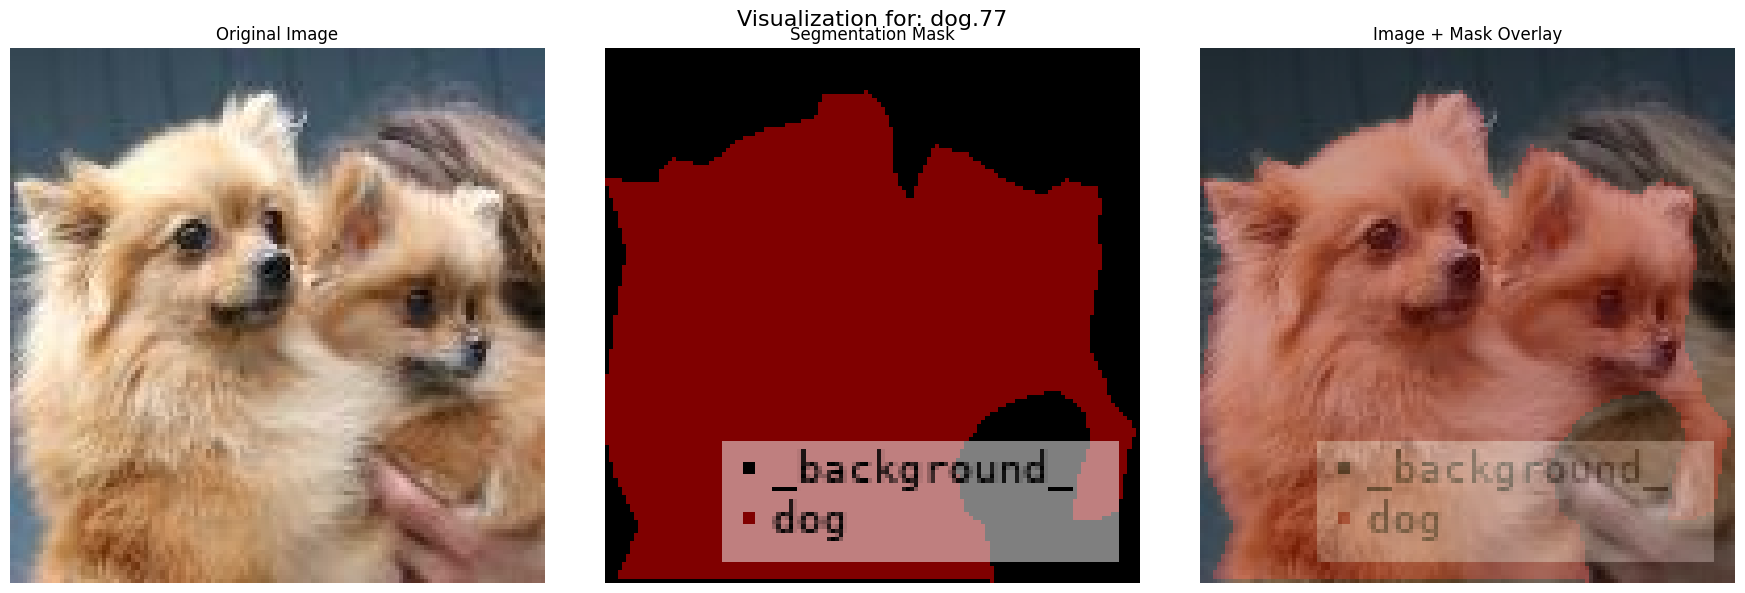

In [38]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import imgviz
import cv2

# Define paths
image_dir = "./data_dataset_voc/JPEGImages"
mask_dir = "./data_dataset_voc/SegmentationClassNpy"
class_names_path = "./data_dataset_voc/class_names.txt"

# Pick ONE random file and create paths for both image and mask
all_images = os.listdir(image_dir)
random_image_filename = random.choice(all_images)
base_filename = os.path.splitext(random_image_filename)[0]
image_path = os.path.join(image_dir, f"{base_filename}.jpg")
mask_path = os.path.join(mask_dir, f"{base_filename}.npy")

print(f"Chosen Image: {image_path}")
print(f"Corresponding Mask: {mask_path}")

#Load the files
img = cv2.imread(image_path)
if img is None:
    print("Error: Image not found at:", image_path)
else:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
mask_image = np.load(mask_path)

# Load class names and create the overlay
with open(class_names_path) as f:
    class_names = [line.strip() for line in f.readlines()]

# The only change is here: font_size is now smaller
mask_color = imgviz.label2rgb(
    label=mask_image,
    label_names=class_names,
    font_size=10, # Adjusted font size for the legend
    loc="rb"
)

overlay = cv2.addWeighted(img, 0.6, mask_color, 0.4, 0)

# Display the results in subplots ---

# Create a figure with 1 row and 3 columns for our plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Original Image
axes[0].imshow(img)
axes[0].set_title("Original Image")
axes[0].axis("off")

# Plot 2: Segmentation Mask
axes[1].imshow(mask_color)
axes[1].set_title("Segmentation Mask")
axes[1].axis("off")

# Plot 3: Overlay
axes[2].imshow(overlay)
axes[2].set_title("Image + Mask Overlay")
axes[2].axis("off")

# Add a title to the entire figure and display it
plt.suptitle(f"Visualization for: {base_filename}", fontsize=16)
plt.tight_layout() # Adjusts subplot params for a tight layout.
plt.show()